In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import get_raw_data
import get_preprocessing_data
import analysis_method
import itertools

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

pv_list = ["0102", "1701", "1702", "0111", "0330", "0331", "0332", "0333", "0101", "0107", "0110", "5501"]
#["0102"(가구주와의 관계), "1701"(근로소득 유무), "1702"(총 연간근로소득), "0111"(학력졸업여부), "0330"(업종8차),
# "0331"(업종9차), "0332"(직종8차), "0333"(직종9차), "0101"(성별), "0107"(만나이), "0110"(학력학교), "5501"(혼인상태)]
hv_list = ["0150", "1406", "2102", "2134", "2136", " 2138", "2140", "2142", "2152", "2153", "2155",
           "2156", "2157", "2158", "2159", "2160", "2182", "2183", "2184", "2185", "2186", "2187",
           "2189", "2190", "2191"]
income_code_list = ["2102", "2134", "2136", " 2138", "2140", "2142", "2152", "2153", "2155", "2156",
                    "2157", "2158", "2159", "2160", "2182", "2183", "2184", "2185", "2186", "2187",
                    "2189", "2190", "2191"]

cpi_data = pd.read_excel("C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\CPI.xls").loc[0, :]
cpi_data_index = pd.read_excel("C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\CPI.xls", dtype="str").loc[14, :].values[1:]
cpi_data = pd.Series(cpi_data.values[1:], dtype="float")
cpi_data.name = "CPI"
cpi_data.index = cpi_data_index

industry_8 = pd.read_excel("C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\국내데이터_산업분류.xlsx", sheet_name="8차")
industry_large = pd.read_excel("C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\국내데이터_산업분류.xlsx", sheet_name="대분류")

data_num = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21"]

cpi_multiple = get_preprocessing_data.get_cpi_multi(cpi_data, data_num)

data_dict = {}
for i in data_num:
    h_path = "C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\h_data\\h_" + i + ".pickle"
    p_path = "C:\\Users\\JeayongYu\\PycharmProjects\\human_captial\\data\\p_data\\p_" + i + ".pickle"

    h_data = pd.read_pickle(h_path)
    p_data = pd.read_pickle(p_path)

    raw_hdata = get_raw_data.get_hv_data(h_data, hv_list, i)
    raw_pdata = get_raw_data.get_pv_data(p_data, pv_list, i)
    
    fin_p_data = get_preprocessing_data.get_fin_personal(raw_pdata, industry_8, industry_large)
    income_data = get_preprocessing_data.get_income_data(fin_p_data.index, raw_hdata)

    fin_x_value = get_preprocessing_data.get_final_xvalue(raw_hdata, fin_p_data)
    fin_y_value = get_preprocessing_data.get_final_yvalue(income_data, cpi_multiple[i])

    finally_preprocessed_data = get_preprocessing_data.get_total_data(fin_y_value, fin_x_value)

    data_dict[i] = finally_preprocessed_data

C:\Users\JeayongYu\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_df = pd.DataFrame()
for i in data_dict.keys():
    data_df = pd.concat([data_df, data_dict[i]])

In [3]:
industry_list = data_df["0330"].value_counts()[:15].index
industry_list

Index(['제조업 (10 ~ 33)', '도매 및 소매업 (45~47)', '건설업 (41 ~ 42)', '운수업(49~52)',
       '교육 서비스업(85)', '협회 및 단체, 수리 및 기타 개인 서비스 업(94~96)',
       '공공행정, 국방 및 사회보장 행정(84)', '출판, 영상, 방송통 신 및 정보서비스업 (58 ~ 63)',
       '금융 및 보험업 (64 ~ 66)', '농업, 임업 및 어업 (01 ~ 03)', '부동산업 및 임대업 (68 ~ 69)',
       '숙박 및 음식점업 (55 ~ 56)', '하수 · 폐기물 처리, 원료재생 및 환경복 원업 (37 ~ 39)',
       '전문, 과학 및 기술 서비스업 (70 ~ 73)', '보건업 및 사회복지 서비스업(86~87)'],
      dtype='object')

In [4]:
statistic_df = pd.DataFrame()
for i in range(3):
    temp_df = pd.DataFrame(data_df.groupby(["0110", "0330"]).size()).loc[1+i, :].loc[industry_list]
    statistic_df = pd.concat([statistic_df, temp_df], axis=1)
    
statistic_df.columns = ["high school", "college", "university"]

statistic_df = pd.concat([statistic_df.T, pd.Series(statistic_df.sum(), name="Total")], axis=1).T
statistic_df = pd.concat([statistic_df, pd.Series(statistic_df.sum(axis=1), name="Total")], axis=1)
statistic_df

,high school,college,university,Total
제조업 (10 ~ 33),6142,1951,2967,11060
도매 및 소매업 (45~47),3439,1199,2040,6678
건설업 (41 ~ 42),3733,824,1267,5824
운수업(49~52),2938,582,678,4198
교육 서비스업(85),725,138,2081,2944
"협회 및 단체, 수리 및 기타 개인 서비스 업(94~96)",1375,349,677,2401
"공공행정, 국방 및 사회보장 행정(84)",925,342,1099,2366
"출판, 영상, 방송통 신 및 정보서비스업 (58 ~ 63)",583,409,1053,2045
금융 및 보험업 (64 ~ 66),402,271,1214,1887
"농업, 임업 및 어업 (01 ~ 03)",1399,152,282,1833


_________________
### 고졸 학력 데이터 & 제조업 (10 ~ 33)

In [5]:
data_df.groupby(["0110", "0330"]).get_group((1, "제조업 (10 ~ 33)"))

,labor income,0101,0110,0107,5501,jobtype,0330,0150,1406
hhid,,,,,,,,,
59.0,4464.228196,1,1,68,1.0,employ,제조업 (10 ~ 33),5.0,1.0
91.0,1940.968781,1,1,51,1.0,unemploy,제조업 (10 ~ 33),5.0,1.0
99.0,3105.550050,1,1,51,1.0,unemploy,제조업 (10 ~ 33),4.0,0.0
115.0,4852.421952,1,1,43,1.0,employ,제조업 (10 ~ 33),4.0,0.0
173.0,3881.937562,1,1,38,1.0,unemploy,제조업 (10 ~ 33),4.0,0.0
...,...,...,...,...,...,...,...,...,...
110251.0,2410.000000,1,1,24,0.0,employ,제조업 (10 ~ 33),1.0,0.0
101398.0,4360.000000,1,1,61,1.0,employ,제조업 (10 ~ 33),3.0,1.0
110252.0,2760.000000,1,1,24,0.0,employ,제조업 (10 ~ 33),1.0,0.0


_________________
### 전문대학졸 학력 데이터 & 운수업(49~52)

In [6]:
data_df.groupby(["0110", "0330"]).get_group((2, "운수업(49~52)"))

,labor income,0101,0110,0107,5501,jobtype,0330,0150,1406
hhid,,,,,,,,,
284.0,5182.386645,1,2,40,1.0,unemploy,운수업(49~52),3.0,0.0
693.0,2329.162537,1,2,29,0.0,employ,운수업(49~52),1.0,0.0
1277.0,2523.259415,1,2,27,0.0,employ,운수업(49~52),1.0,0.0
1476.0,2523.259415,1,2,30,1.0,employ,운수업(49~52),3.0,0.0
1553.0,3687.840684,1,2,38,1.0,employ,운수업(49~52),4.0,1.0
...,...,...,...,...,...,...,...,...,...
100827.0,7063.000000,1,2,60,1.0,employ,운수업(49~52),3.0,0.0
110118.0,4900.000000,1,2,45,1.0,employ,운수업(49~52),2.0,1.0
101241.0,3000.000000,1,2,38,1.0,employ,운수업(49~52),3.0,1.0


_________________
### 대학 이상 졸업 학력 데이터 & 금융 및 보험업 (64 ~ 66)


In [7]:
data_df.groupby(["0110", "0330"]).get_group((3, "금융 및 보험업 (64 ~ 66)"))

,labor income,0101,0110,0107,5501,jobtype,0330,0150,1406
hhid,,,,,,,,,
36.0,6793.390733,1,3,42,1.0,employ,금융 및 보험업 (64 ~ 66),4.0,0.0
47.0,4852.421952,1,3,34,1.0,employ,금융 및 보험업 (64 ~ 66),3.0,1.0
136.0,3493.743806,1,3,29,0.0,employ,금융 및 보험업 (64 ~ 66),3.0,0.0
252.0,3881.937562,1,3,31,1.0,employ,금융 및 보험업 (64 ~ 66),5.0,1.0
287.0,5822.906343,1,3,33,1.0,employ,금융 및 보험업 (64 ~ 66),3.0,0.0
...,...,...,...,...,...,...,...,...,...
8088.0,12290.000000,1,3,39,1.0,employ,금융 및 보험업 (64 ~ 66),4.0,1.0
8607.0,12000.000000,1,3,36,1.0,employ,금융 및 보험업 (64 ~ 66),3.0,0.0
8727.0,7060.000000,1,3,38,1.0,employ,금융 및 보험업 (64 ~ 66),3.0,0.0


_______________________________


### 각 Educated group별 Fixed effects regression results

In [8]:
start_list = [30, 30, 30]
edu_list = ["high_school", "college", "university"]

fer_results_dict_top = {}
for i in range(3):
    fer_results_dict = {}
    for j in industry_list:
        temp_edu = data_df.groupby(["0110", "0330"]).get_group((i+1, j))
        temp_edu = get_preprocessing_data.get_agecut_data(temp_edu, start_list[i])

        #print("-----------------------------------------------------------")
        #print(edu_list[i], j)
        fer_results = analysis_method.fe_regression_sol(temp_edu, False)

        fer_results_dict[j] = fer_results 
        
    fer_results_dict_top[edu_list[i]] = fer_results_dict

In [10]:
columns_name = ["parames", "pvalue"]
pd.DataFrame.from_dict({(i, j, k): fer_results_dict_top[i][j][np.where(np.array(columns_name) == k)[0][0]]
                        for i in fer_results_dict_top.keys()
                        for j in fer_results_dict_top[i].keys()
                        for k in columns_name}, orient="columns").to_excel("./results2.xlsx")

In [21]:
pd.DataFrame.from_dict({(i, j, k): fer_results_dict_top[i][j][np.where(np.array(columns_name) == k)[0][0]]
                        for i in fer_results_dict_top.keys()
                        for j in fer_results_dict_top[i].keys()
                        for k in columns_name}, orient="columns")

high_school                                                 \
           제조업 (10 ~ 33)         도매 및 소매업 (45~47)         건설업 (41 ~ 42)   
                 parames  pvalue          parames  pvalue       parames   
family_num      0.067588  0.0000         0.034164  0.0051      0.059188   
intercept       7.720276  0.0000         7.680060  0.0000      7.438862   
marriage        0.224784  0.0000         0.260977  0.0000      0.339993   
30             -0.161750  0.0010        -0.046390  0.5236     -0.136807   
31             -0.139691  0.0026        -0.079735  0.2057     -0.081469   
32             -0.166596  0.0001         0.087117  0.1622     -0.087746   
33             -0.102249  0.0095         0.064793  0.2885      0.107472   
34             -0.064420  0.0855        -0.068721  0.2598      0.046751   
35              0.014215  0.7064         0.040525  0.4707      0.060287   
36             -0.002783  0.9397         0.128379  0.0213      0.019842   
37              0.018348  0.6229         0.159522  0.0049      0.172787   
38             -0.053806  0.1296         0.089680  0.0997      0.135987   
39             -0.017437  0.6141         0.136263  0.0108      0.084167   
40              0.107971  0.0017         0.211209  0.0001      0.146173   
41              0.103547  0.0031         0.183728  0.0006      0.079993   
42              0.083380  0.0198         0.252023  0.0000      0.084388   
43              0.180048  0.0000         0.207040  0.0002      0.130559   
44              0.224426  0.0000         0.205860  0.0002      0.133243   
45              0.208484  0.0000         0.214535  0.0002      0.251911   
46              0.287647  0.0000         0.162055  0.0045      0.216902   
47              0.281267  0.0000         0.295591  0.0000      0.227342   
48              0.224857  0.0000         0.392796  0.0000      0.301752   
49              0.250360  0.0000         0.265519  0.0000      0.277040   
50              0.322766  0.0000         0.308795  0.0000      0.272245   
51              0.313843  0.0000         0.299471  0.0000      0.278981   
52              0.354205  0.0000         0.330664  0.0000      0.302089   
53              0.369455  0.0000         0.426797  0.0000      0.296224   
54              0.420757  0.0000         0.466824  0.0000      0.361217   
55              0.537586  0.0000         0.372155  0.0000      0.331998   
56              0.517236  0.0000         0.296586  0.0000      0.451094   
57              0.474975  0.0000         0.320853  0.0000      0.305265   
58              0.494730  0.0000         0.386807  0.0000      0.450479   
59              0.429169  0.0000         0.395918  0.0000      0.420484   
60              0.443415  0.0000         0.281068  0.0008      0.439493   
61              0.468316  0.0000         0.288527  0.0007      0.289944   
62              0.486807  0.0000         0.245223  0.0044      0.346510   
63              0.364354  0.0000         0.107034  0.2741      0.428628   
64              0.446845  0.0000         0.251550  0.0206      0.293637   

                                                           ...  \
                   운수업(49~52)         교육 서비스업(85)          ...   
            pvalue    parames  pvalue     parames  pvalue  ...   
family_num  0.0000   0.052596  0.0000    0.043832  0.1211  ...   
intercept   0.0000   7.432440  0.0000    7.298489  0.0000  ...   
marriage    0.0000   0.416059  0.0000    0.653882  0.0000  ...   
30          0.1906   0.012297  0.9256   -0.114649  0.5268  ...   
31          0.3843  -0.111027  0.2613    0.092972  0.5932  ...   
32          0.2526  -0.121626  0.1402    0.077560  0.6069  ...   
33          0.1546  -0.188189  0.0191    0.163602  0.3391  ...   
34          0.5139  -0.081930  0.2839    0.253340  0.1227  ...   
35          0.3807   0.055395  0.4352    0.171316  0.2959  ...   
36          0.7566  -0.025495  0.6969    0.264605  0.1204  ...   
37          0.0049   0.050624  0.3809    0.332311  0.0148  ...   
38          0

_______________________________


### 각 Educated group별 Labor income proﬁles (age dummies and ﬁtted 3rd-order polynomials)

In [15]:
fitting_result_dict_top = {}
for j in fer_results_dict_top.keys():
    fitting_result_dict = {}
    for i in fer_results_dict.keys():
        fitting_result_dict[i] = analysis_method.fitting_polynomial(fer_results_dict_top[j][i], 3, False)

        #fitting_result_dict[i][0].plot(figsize=(10, 5))
        #plt.show()
    fitting_result_dict_top[j] = fitting_result_dict

In [20]:
pd.DataFrame.from_dict({(i, j, k): fitting_result_dict_top[i][j][np.where(np.array(columns_name) == k)[0][0]+1]
                        for i in fitting_result_dict_top.keys()
                        for j in fitting_result_dict_top[i].keys()
                        for k in columns_name}, orient="columns")

high_school                                                     \
           제조업 (10 ~ 33)           도매 및 소매업 (45~47)           건설업 (41 ~ 42)   
                 parames    pvalue          parames    pvalue       parames   
intercept       1.568559  0.107847         1.403411  0.269136     -0.012886   
age^1/10^0     -0.157337  0.018702        -0.137643  0.109257     -0.031489   
age^2/10^1      0.043551  0.003517         0.040103  0.034652      0.013485   
age^3/10^2     -0.003399  0.001498        -0.003369  0.013409     -0.001194   

                                                                 ...  \
                     운수업(49~52)           교육 서비스업(85)            ...   
              pvalue    parames    pvalue     parames    pvalue  ...   
intercept   0.991483   2.460864  0.059117   -1.204698  0.703427  ...   
age^1/10^0  0.697050  -0.217283  0.014668    0.087877  0.678255  ...   
age^2/10^1  0.444835   0.057865  0.003456   -0.019298  0.675231  ...   
age^3/10^2  0.340603  -0.004576  0.001297    0.001474  0.651170  ...   

                     university                                          \
           부동산업 및 임대업 (68 ~ 69)           숙박 및 음식점업 (55 ~ 56)             
                        parames    pvalue             parames    pvalue   
intercept             12.899906  0.000493           -3.046747  0.534306   
age^1/10^0            -0.853444  0.000557            0.190928  0.567441   
age^2/10^1             0.183069  0.000642           -0.039460  0.594038   
age^3/10^2            -0.012592  0.000861            0.002917  0.585948   

                                                           \
           하수 · 폐기물 처리, 원료재생 및 환경복 원업 (37 ~ 39)             
                                        parames    pvalue   
intercept                             -1.196017  0.591883   
age^1/10^0                             0.049295  0.740918   
age^2/10^1                            -0.004733  0.883825   
age^3/10^2                             0.000166  0.942134   

                                                                        \
           전문, 과학 및 기술 서비스업 (70 ~ 73)           보건업 및 사회복지 서비스업(86~87)   
                              parames    pvalue                parames   
intercept                    2.005162  0.574171               7.331357   
age^1/10^0                  -0.159702  0.504132              -0.555193   
age^2/10^1                   0.038515  0.459123               0.136701   
age^3/10^2                  -0.002682  0.466415              -0.010664   

                      
                      
              pvalue  
intercept   0.016356  
age^1/10^0  0.007279  
age^2/10^1  0.002755  
age^3/10^2  0.001139  

[4 rows x 90 columns]

In [16]:
columns_name = ["parames", "pvalue"]
pd.DataFrame.from_dict({(i, j, k): fitting_result_dict_top[i][j][np.where(np.array(columns_name) == k)[0][0]+1]
                        for i in fitting_result_dict_top.keys()
                        for j in fitting_result_dict_top[i].keys()
                        for k in columns_name}, orient="columns").to_excel("./results3.xlsx")

In [17]:
polynomials_plot = pd.DataFrame.from_dict({(i, j, k): fitting_result_dict_top[i][j][0].loc[:, k]
                        for i in fitting_result_dict_top.keys()
                        for j in fitting_result_dict_top[i].keys()
                        for k in fitting_result_dict_top[i][j][0].columns}, orient="columns").to_excel("./results4.xlsx")

In [18]:
polynomials_plot = pd.DataFrame.from_dict({(i, j, k): fitting_result_dict_top[i][j][0].loc[:, k]
                        for i in fitting_result_dict_top.keys()
                        for j in fitting_result_dict_top[i].keys()
                        for k in fitting_result_dict_top[i][j][0].columns}, orient="columns")

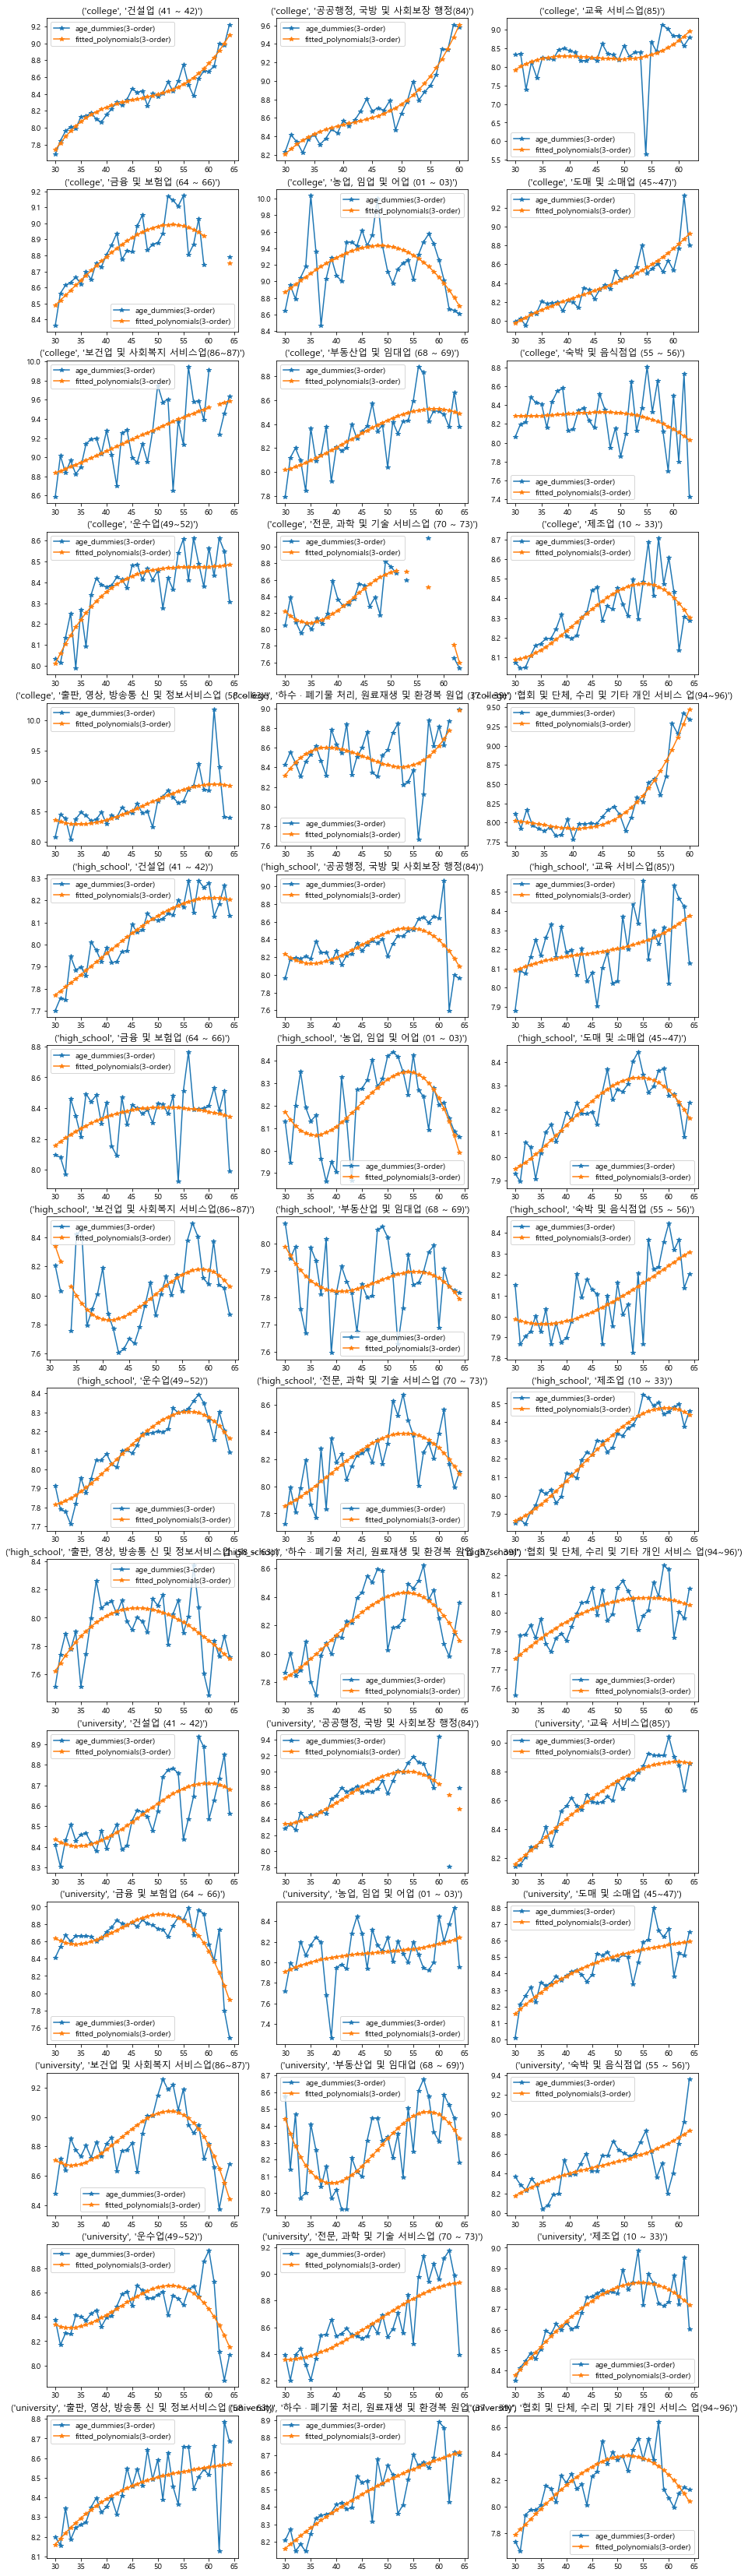

In [12]:
polynomials_plot = pd.DataFrame.from_dict({(i, j, k): fitting_result_dict_top[i][j][0].loc[:, k]
                        for i in fitting_result_dict_top.keys()
                        for j in fitting_result_dict_top[i].keys()
                        for k in fitting_result_dict_top[i][j][0].columns}, orient="columns")

subplot_1 = len(polynomials_plot.columns.levels[0])
subplot_2 = len(polynomials_plot.columns.levels[1])

col_combination = list(itertools.product(*polynomials_plot.columns.levels[0:2]))

plt.figure(figsize=(15, 60))
for i in range(subplot_1*subplot_2):
    plt.subplot(subplot_2, subplot_1, i+1)
    plt.plot(polynomials_plot[col_combination[i][0]][col_combination[i][1]], "*-")
    plt.title(col_combination[i])
    plt.legend(polynomials_plot[col_combination[i][0]][col_combination[i][1]].columns)
    
plt.show()

_______________________________


### 각 Educated group별 Labor income proﬁles (age dummies and ﬁtted 5th-order polynomials)

In [13]:
fitting_result_dict_top = {}
for j in fer_results_dict_top.keys():
    fitting_result_dict = {}
    for i in fer_results_dict.keys():
        fitting_result_dict[i] = analysis_method.fitting_polynomial(fer_results_dict_top[j][i], 5, False)

        #fitting_result_dict[i][0].plot(figsize=(10, 5))
        #plt.show()
    fitting_result_dict_top[j] = fitting_result_dict

In [14]:
columns_name = ["parames", "pvalue"]
pd.DataFrame.from_dict({(i, j, k): fitting_result_dict_top[i][j][np.where(np.array(columns_name) == k)[0][0]+1]
                        for i in fitting_result_dict_top.keys()
                        for j in fitting_result_dict_top[i].keys()
                        for k in columns_name}, orient="columns")

high_school                                                     \
           제조업 (10 ~ 33)           도매 및 소매업 (45~47)           건설업 (41 ~ 42)   
                 parames    pvalue          parames    pvalue       parames   
intercept      -4.016686  0.875867       -23.471530  0.491679    -46.673345   
age^1/10^0      0.324093  0.911021         2.516028  0.513283      4.909653   
age^2/10^1     -0.102477  0.936600        -1.067604  0.532221     -2.031487   
age^3/10^2      0.013607  0.961496         0.222967  0.550889      0.412545   
age^4/10^3     -0.000241  0.993663        -0.022661  0.573800     -0.040956   
age^5/10^4     -0.000056  0.965680         0.000890  0.603142      0.001588   

                                                                 ...  \
                     운수업(49~52)           교육 서비스업(85)            ...   
              pvalue    parames    pvalue     parames    pvalue  ...   
intercept   0.117086  73.892487  0.021001 -128.576890  0.091429  ...   
age^1/10^0  0.142805  -8.528346  0.018441   13.535618  0.114060  ...   
age^2/10^1  0.171236   3.858753  0.016567   -5.565310  0.142376  ...   
age^3/10^2  0.203080  -0.858674  0.014965    1.118935  0.176378  ...   
age^4/10^3  0.240159   0.094334  0.013325   -0.110086  0.216057  ...   
age^5/10^4  0.283118  -0.004099  0.011618    0.004245  0.260798  ...   

                     university                                          \
           부동산업 및 임대업 (68 ~ 69)           숙박 및 음식점업 (55 ~ 56)             
                        parames    pvalue             parames    pvalue   
intercept             71.135686  0.442843         -182.075103  0.053724   
age^1/10^0            -7.470400  0.474649           23.101571  0.034209   
age^2/10^1             3.139293  0.498656          -11.482645  0.021023   
age^3/10^2            -0.661983  0.514199            2.793040  0.012622   
age^4/10^3             0.070181  0.521159           -0.332410  0.007512   
age^5/10^4            -0.002987  0.520747            0.015499  0.004477   

                                                           \
           하수 · 폐기물 처리, 원료재생 및 환경복 원업 (37 ~ 39)             
                                        parames    pvalue   
intercept                            106.391846  0.076419   
age^1/10^0                           -12.158222  0.072842   
age^2/10^1                             5.441495  0.070846   
age^3/10^2                            -1.194528  0.069953   
age^4/10^3                             0.128936  0.069629   
age^5/10^4                            -0.005481  0.069718   

                                                                        \
           전문, 과학 및 기술 서비스업 (70 ~ 73)           보건업 및 사회복지 서비스업(86~87)   
                              parames    pvalue                parames   
intercept                  256.205341  0.000582            -308.474766   
age^1/10^0                 -30.076376  0.000380              35.004408   
age^2/10^1                  13.870178  0.000250             -15.604286   
age^3/10^2                  -3.142761  0.000166               3.415321   
age^4/10^3                   0.350127  0.000112              -0.366883   
age^5/10^4                  -0.015348  0.000076               0.015478   

                      
                      
              pvalue  
intercept   0.000004  
age^1/10^0  0.000004  
age^2/10^1  0.000004  
age^3/10^2  0.000004  
age^4/10^3  0.000004  
age^5/10^4  0.000004  

[6 rows x 90 columns]

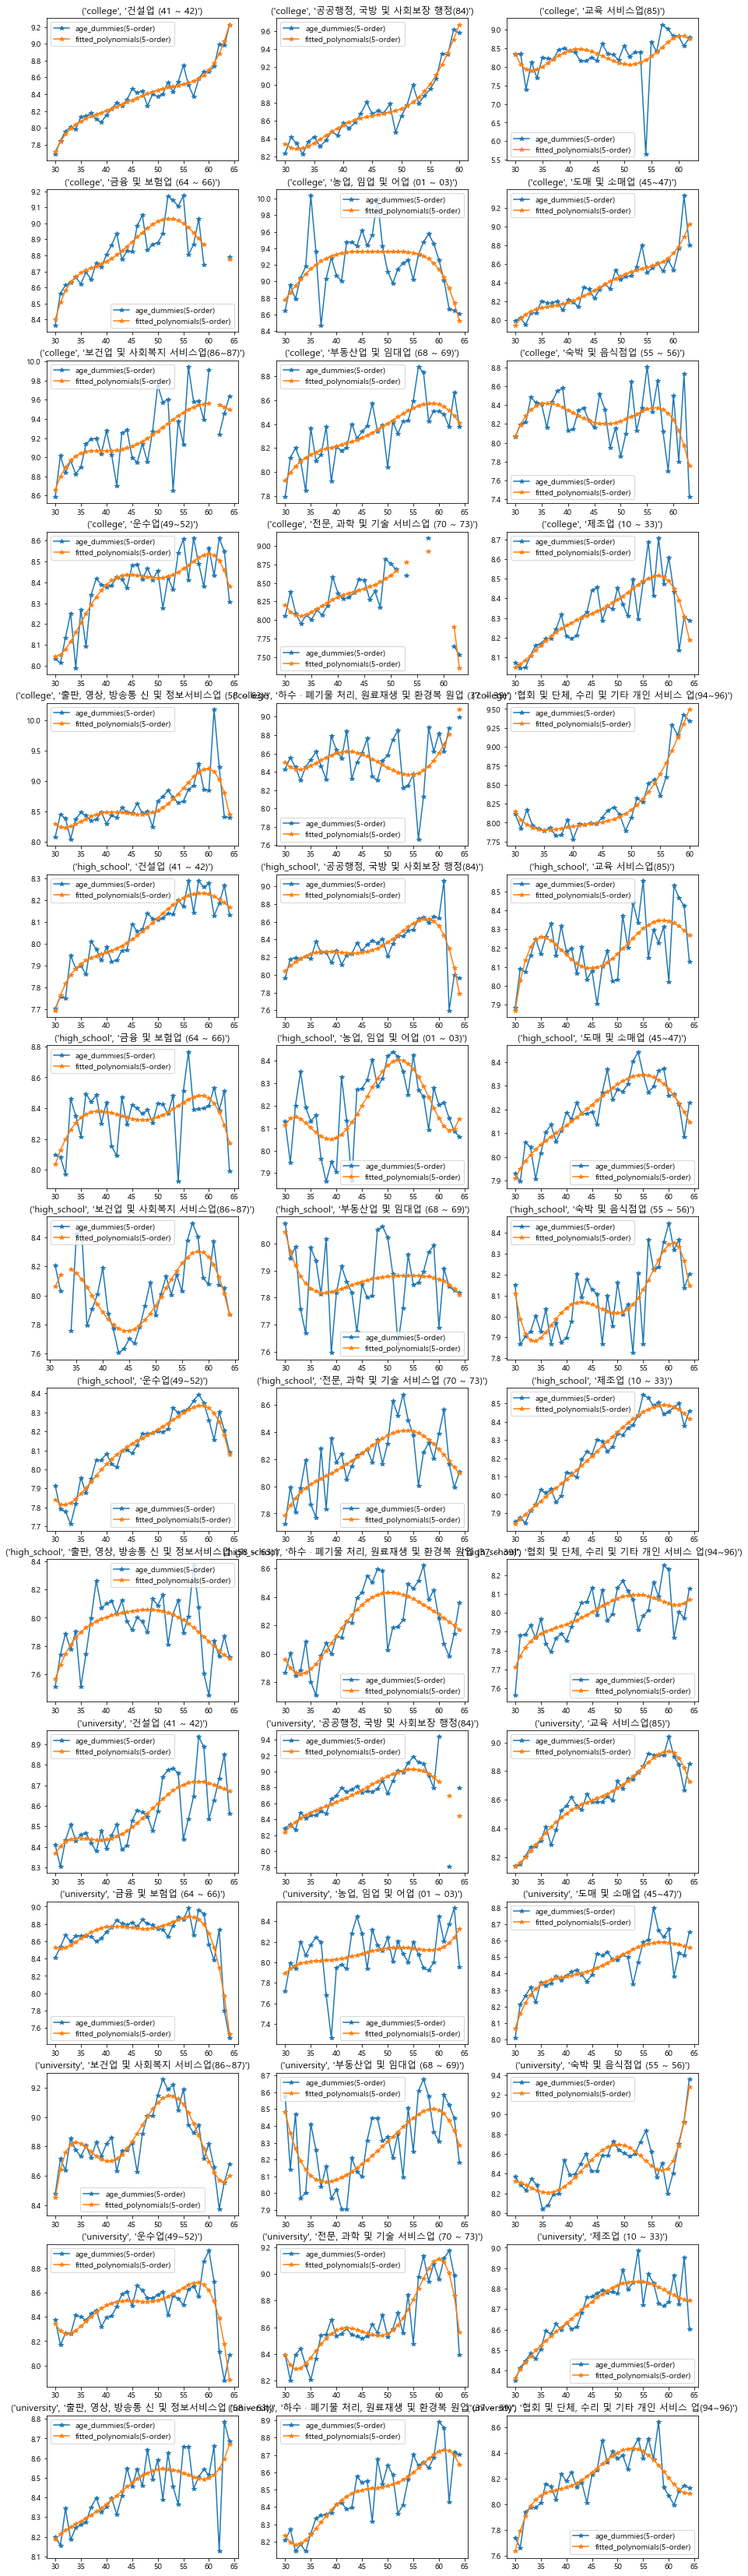

In [15]:
polynomials_plot = pd.DataFrame.from_dict({(i, j, k): fitting_result_dict_top[i][j][0].loc[:, k]
                        for i in fitting_result_dict_top.keys()
                        for j in fitting_result_dict_top[i].keys()
                        for k in fitting_result_dict_top[i][j][0].columns}, orient="columns")

subplot_1 = len(polynomials_plot.columns.levels[0])
subplot_2 = len(polynomials_plot.columns.levels[1])

col_combination = list(itertools.product(*polynomials_plot.columns.levels[0:2]))

plt.figure(figsize=(15, 60))
for i in range(subplot_1*subplot_2):
    plt.subplot(subplot_2, subplot_1, i+1)
    plt.plot(polynomials_plot[col_combination[i][0]][col_combination[i][1]], "*-")
    plt.title(col_combination[i])
    plt.legend(polynomials_plot[col_combination[i][0]][col_combination[i][1]].columns)
    
plt.show()